# Runtime Analysis Demonstration

This notebook gives examples of graphing the runtime to compare linear, quadratic and cubic functions.

The `runtime_analysis` function below is designed to take a function `f` and a list of inputs of increasing size. It produces a graph where the x axis is the size of the input and the y axis is the runtime.

In [1]:
from timeit import Timer
import matplotlib.pyplot as plt
import numpy as np
import urllib
%matplotlib inline

def runtime_analysis(f, inputs, number=20):
    '''
    INPUT: f: function which takes a single argument
           inputs: lists of arguments to pass into the function f (should be of increasing size)
           number: number of times to excecute the function. uses the average of these runs to get the runtime.
    Create a graph of the runtime of the function f:
        x-axis: size of the input
        y-axis: runtime
    '''
    function_name = f.__name__
    print("TESTING: {0}".format(function_name))
    y = []
    for n in inputs:
        t = Timer(stmt='{0}({1})'.format(function_name, n),
                  setup='from __main__ import {0}'.format(function_name))
        y.append(t.timeit(number) / number)
    x = [len(i) for i in inputs]
    plt.plot(x, y, label=function_name, marker='.')
    plt.legend()

### Example 1: Looping Over a List

These four functions are 4 different ways of looping over a list:
    
1. Using `range`
2. Using the pythonic `for item in lst`
3. Using `enumerate`
4. Using `list(range)`

These are all linear (`O(n)`), but you'll notice they have different constants (the slope of the lines are different).

TESTING: f1
TESTING: f2
TESTING: f3
TESTING: f4


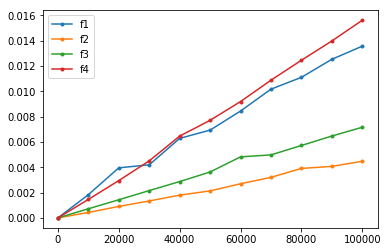

In [2]:
def f1(lst):
    for i in range(len(lst)):
        lst[i] * 2

def f2(lst):
    for item in lst:
        item * 2

def f3(lst):
    for i, item in enumerate(lst):
        item * 2

def f4(lst):
    for i in list(range(len(lst))):
        lst[i] * 2

inputs = [range(n) for n in range(0, 100001, 10000)]
runtime_analysis(f1, inputs)
runtime_analysis(f2, inputs)
runtime_analysis(f3, inputs)
runtime_analysis(f4, inputs)

### Example 2: Finding an Element in a List

The `find_element` function implements what the `in` operator in python does: determining whether or not an element is in a list.

The `find_element_test` is just a function which calls `find_element` and automatically picks an element to search for. This makes it possible to use with the `runtime_analysis` function.

TESTING: find_element_test


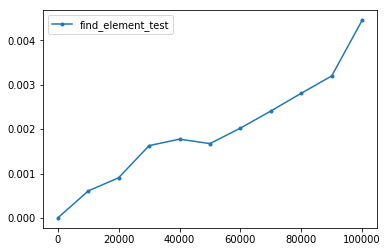

In [3]:
def find_element(lst, element):
    '''
    Return True iff element is in lst.
    '''
    for elem in lst:
        if elem == element:
            return True
    return False

def find_element_test(lst):
    '''
    Run find_element to search for the last element in the lst.
    '''
    elem = lst[-1] if lst else 0
    return find_element(lst, elem)

inputs = [range(n) for n in range(0, 100001, 10000)]
runtime_analysis(find_element_test, inputs)

### Exercise: What's the runtime of each function?

By just looking at the code, can you determine the runtime? Run the code below to verify your answer.

Note that when you have multiple lists you'll need to define multiple runtimes.

In [4]:
def oneloop(lst):
    for item in lst:
        pass

def twoloop(lst):
    for item in lst:
        pass
    for item in lst:
        pass

def nestedloop(lst):
    for item in lst:
        for item in lst:
            pass

def loopy1(lst):
    for item in lst:
        for item in lst:
            pass
        for item in lst:
            for item in lst:
                pass
            for item in lst:
                pass
    for item in lst:
        for item in lst:
            pass
        for item in lst:
            pass

def loopy2(lst):
    for item in lst:
        for item in lst:
            if item in lst:
                pass
        for item in lst:
            pass

def loopy3(lst):
    for item in lst:
        for item in lst:
            if item == 0:
                pass
        for item in lst:
            pass

def loopy4(lst1, lst2, lst3):
    for item in lst1:
        for item in lst2:
            pass
        for item in lst3:
            for item in lst2:
                pass

The following 4 snippets graph the runtime of `oneloop`, `twoloop`, `nestedloop`, `loopy1`, `loopy2` and `loopy3`. Look at the graphs to see the difference in runtime.

The functions which are linear (`O(n)`) should be easy to spot.
Quadratic functions (`O(n^2)`) increase faster, and cubic (`O(n^3)`) increase even faster.

TESTING: oneloop
TESTING: twoloop


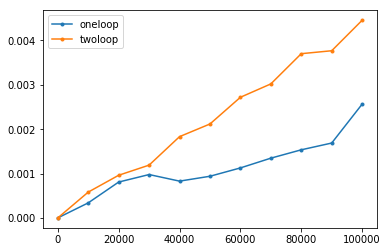

In [5]:
inputs = [range(n) for n in range(0, 100001, 10000)]
runtime_analysis(oneloop, inputs)
runtime_analysis(twoloop, inputs)

TESTING: oneloop
TESTING: nestedloop


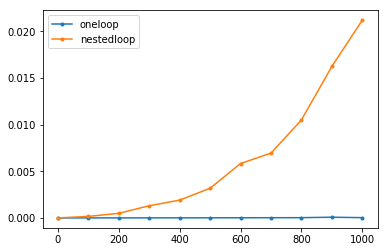

In [6]:
inputs = [range(n) for n in range(0, 1001, 100)]
runtime_analysis(oneloop, inputs)
runtime_analysis(nestedloop, inputs)

TESTING: oneloop
TESTING: nestedloop
TESTING: loopy1


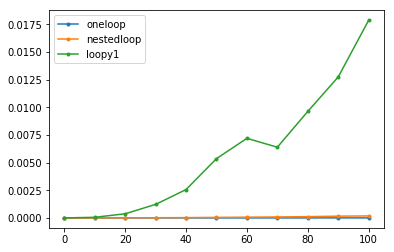

In [7]:
inputs = [range(n) for n in range(0, 101, 10)]
runtime_analysis(oneloop, inputs)
runtime_analysis(nestedloop, inputs)
runtime_analysis(loopy1, inputs)

TESTING: loopy1
TESTING: loopy2
TESTING: loopy3


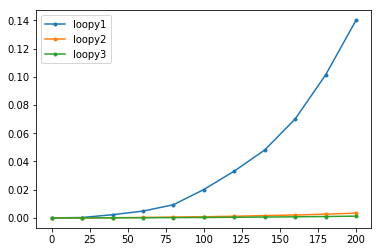

In [8]:
inputs = [range(n) for n in range(0, 201, 20)]
runtime_analysis(loopy1, inputs)
runtime_analysis(loopy2, inputs)
runtime_analysis(loopy3, inputs)

### Example: Finding Anagrams

There's two implementations of finding anagrams below. The first is `O(n^2)` and the second is `O(n)` where `n` is the length of `lst`.

Look at the graphs below to see how important this efficiency difference is.

In [9]:
from collections import defaultdict

def find_anagrams1(lst):
    result = []
    for word1 in lst:
        for word2 in lst:
            if word1 != word2 and sorted(word1) == sorted(word2):
                result.append(word1)
                break
    return result

def find_anagrams2(lst):
    result = []
    d = defaultdict(list)
    for word in lst:
        d[tuple(sorted(word))].append(word)
    for key, value in d.items():
        if len(value) > 1:
            result.extend(value)
    return result

In [10]:
# Create wordlists of lenths 10, 20, ... 200 for testing anagrams

with urllib.request.urlopen('http://www.mieliestronk.com/corncob_lowercase.txt') as f:
    text = f.read().decode()
    words = [word.strip() for word in text.split('\n')] # all words in the dictionary

wordlists = []
for n in range(10, 200, 10):
    wordlists.append(words[:n])

TESTING: find_anagrams1
TESTING: find_anagrams2


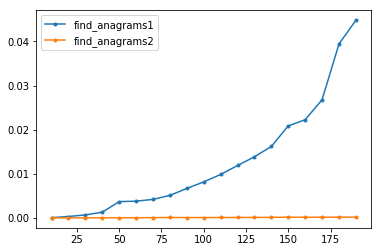

In [11]:
runtime_analysis(find_anagrams1, wordlists, number=10)
runtime_analysis(find_anagrams2, wordlists, number=10)